# Adaboost

Preksha

In [23]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('loan_approval_dataset.csv')
df.columns = df.columns.str.strip()
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [25]:
#standardize and one hot encode
train,test = train_test_split(df, train_size=0.8)

X_train = train.drop('loan_status', axis=1)
y_train = train['loan_status']

# Numeric vs categorical
X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')


# # Scale numeric
# from sklearn.preprocessing import StandardScaler
# stnd = StandardScaler().set_output(transform='pandas')
# X_train_num = stnd.fit_transform(X_train_num)

X_train_cat = pd.get_dummies(X_train_cat, drop_first=False)

X_train = pd.concat([X_train_num, X_train_cat], axis=1)

X_train.head(3)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
4080,4081,0,8300000,17500000,20,643,24800000,8900000,18800000,5100000,False,True,False,True
564,565,5,2000000,6100000,2,407,1900000,1900000,4600000,2000000,True,False,True,False
1298,1299,2,2200000,4800000,6,721,1800000,100000,6900000,2200000,True,False,True,False


In [26]:
# standardize the test set
X_test = test.drop('loan_status', axis=1)
y_test = test.loan_status

X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(exclude='number')

X_test_cat = pd.get_dummies(X_test_cat, drop_first=False)

# X_test_num = stnd.transform(X_test_num)

X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [27]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0]
}

# Set up the AdaBoost model
adb = AdaBoostClassifier()

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=adb,
                           param_grid=param_grid,
                           scoring='accuracy',  # You can change this to 'f1', 'roc_auc', etc.
                           cv=5,
                           n_jobs=-1,  # Use all available CPU cores
                           verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)

print("Test accuracy:", test_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'learning_rate': 1.0, 'n_estimators': 300}
Best cross-validated score: 0.9704245973645682
Test accuracy: 0.9730679156908665


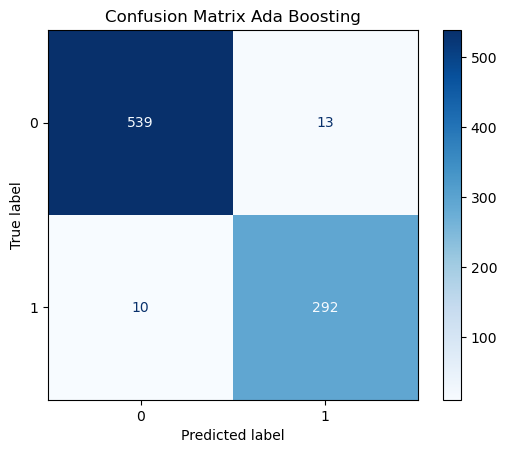

In [28]:
cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Ada Boosting")
plt.show()